In [ ]:
#Data Data Cleaning and Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format #para os números aparecerem com duas casas decimais
pd.set_option('display.max_columns', 50) #mostra 50 colunas ou o número desejado
pd.set_option('future.no_silent_downcasting', True)

dados = pd.read_excel("dados-2016-2021.xlsx", decimal=',')
dados.shape

#salvando os dados de 2021
dados21 = dados[dados['ANO_APOLICE'] == 2021]
dados21.shape

#Cada uma das 212839 linhas, é uma apólice contratada por um produtor. 

dados21.head

#cópia de segurança (copy of our database), vamos trabalhar com uma cópia dos dados, não com o conjunto original
seg = dados21.copy()

seg.head()

seg.tail()

seg.sample(10)

seg.columns #mostra as variáveis que temos no conjunto de dados

seg.info() #algumas variáveis, como DT_FIM_VIGENCIA vão precisar ter o seu dtype alterado. 

#FILTRANDO LINHAS #fazendo apenas consultas na base
#aqui vamos usar principalmente o método iloc
#iloc: que é utilizado para selecionar linhas e colunas, a partir de sua posição inteira
#loc: e não a partir dos rótulos ou nomes das linhas/colunas 

seg.iloc[:20, :10] #os dois pontos indicam toda a coluna

seg['NM_CULTURA_GLOBAL'].unique() #verificando quais tipos de culturas


seg['NM_MUNICIPIO_PROPRIEDADE'].unique() #verificando quantos municipios

seg['SG_UF_PROPRIEDADE'].unique() #verificando os estados

#selecionando a partir do nome da coluna
seg.loc[:, ['NR_AREA_TOTAL', 'NR_PRODUTIVIDADE_ESTIMADA', 'VL_LIMITE_GARANTIA', 
            'VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'NR_APOLICE', 'NM_CULTURA_GLOBAL']]
 

#selecionando o estado do PR
seg_pr = seg.loc[seg['SG_UF_PROPRIEDADE'] == 'PR'] 

#principais culturas seguradas do Estado do PR
seg_pr['NM_CULTURA_GLOBAL'].unique()

#salvando os dados do meu município
seg_maringa = seg.loc[seg['NM_MUNICIPIO_PROPRIEDADE'] == 'Maringá'] 

#principais safras seguradas do meu municipio
seg_maringa['NM_CULTURA_GLOBAL'].unique() 

#poderíamos usar o query também
seg.query('(NM_MUNICIPIO_PROPRIEDADE == "Maringá") and (NM_CULTURA_GLOBAL == "Soja")')

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   NM_RAZAO_SOCIAL            212839 non-null  object        
 1   CD_PROCESSO_SUSEP          212839 non-null  int64         
 2   NR_PROPOSTA                212839 non-null  object        
 3   ID_PROPOSTA                212839 non-null  int64         
 4   DT_PROPOSTA                212839 non-null  datetime64[ns]
 5   DT_INICIO_VIGENCIA         212839 non-null  datetime64[ns]
 6   DT_FIM_VIGENCIA            212839 non-null  object        
 7   NM_SEGURADO                212839 non-null  object        
 8   NR_DOCUMENTO_SEGURADO      212839 non-null  object        
 9   NM_MUNICIPIO_PROPRIEDADE   212839 non-null  object        
 10  SG_UF_PROPRIEDADE          212839 non-null  object        
 11  LATITUDE                   212839 non-null  object  

,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
524955,Allianz Seguros S.A,15414002759200717,116373451,1335705,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,21,32,W,52,2,4,-,-,PRODUTIVIDADE,Soja,38.72,0,3787.41,2461.82,0.65,223052.76,11211.09,0.05,2242.21,5177202135010003619,2021-05-27,2021,4115200,100847.58,SECA
524992,Allianz Seguros S.A,15414002759200717,116373742,1335742,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,21,1,W,52,2,44,-,-,PRODUTIVIDADE,Soja,29.04,0,3787.41,2461.82,0.65,167289.57,8408.33,0.05,1681.66,5177202135010003618,2021-05-27,2021,4115200,45591.56,SECA
525004,Allianz Seguros S.A,15414002759200717,116373896,1335754,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,20,50,W,52,3,16,-,-,PRODUTIVIDADE,Soja,10.89,0,3787.41,2461.82,0.65,62733.59,3153.10,0.05,630.61,5177202135010003617,2021-05-27,2021,4115200,0,SECA
525013,Allianz Seguros S.A,15414002759200717,116374031,1335765,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,24,2,W,52,1,28,-,-,PRODUTIVIDADE,Soja,12.10,0,3787.41,2461.82,0.65,69703.99,3503.43,0.05,700.68,5177202135010003616,2021-05-27,2021,4115200,35182.79,SECA
525026,Allianz Seguros S.A,15414002759200717,116374411,1335778,2021-05-26,2021-09-15,2022-04-03 00:00:00,ADRIANA RAFAEL BORTOLO,***03860926,Maringá,PR,S,23,24,0,W,52,3,18,-,-,PRODUTIVIDADE,Soja,25.00,0,3787.41,2461.82,0.65,144016.50,7238.56,0.05,1447.70,5177202135010003615,2021-05-27,2021,4115200,75431.16,SECA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680783,BRASILSEG COMPANHIA DE SEGUROS,15414609027202020,263607701,1507272,2021-04-09,2021-04-09,2022-04-09 00:00:00,MARCELO VINICIUS ARANTES,***13551900,Maringá,PR,S,23,27,53,W,51,55,12,-,-,CUSTEIO,Soja,140.00,-,3597,2517.90,0.70,344723.16,32411.47,0.09,6482.29,132447,2021-04-22,2021,4115200,94419.67,SECA
680896,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,267035090,1507387,2021-10-19,2021-10-19,2022-10-19 00:00:00,JOSUE FAGUNDES VERDERIO JUNIOR,***63198991,Maringá,PR,S,23,30,11,W,52,2,57,-,-,CUSTEIO,Soja,47.00,-,3100,2170,0.70,326500.82,25440.28,0.08,5088.06,186197,2021-10-25,2021,4115200,239216.23,SECA
683343,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,264309973,1509915,2021-05-24,2021-05-24,2022-05-24 00:00:00,MARIA IZABEL RODRIGUES MUNHOZ,***45990912,Maringá,PR,S,23,19,37,W,52,1,7,-,-,CUSTEIO,Soja,36.30,-,3652,2556.40,0.70,489739.82,17205.12,0.04,3441.02,141671,2021-05-26,2021,4115200,70333.90,INUNDAÇÃO/TROMBA D´ÁGUA
683787,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,266665058,1510362,2021-09-28,2021-09-28,2022-09-28 00:00:00,NELIDA CREMM PAVESI,***11010900,Maringá,PR,S,23,20,37,W,51,58,17,-,-,CUSTEIO,Soja,60.50,-,3560,2492,0.70,466018.64,39172.79,0.08,7834.56,181710,2021-09-30,2021,4115200,146899.99,CHUVA EXCESSIVA


In [2]:
#Resumindo os dados

seg.describe()

,CD_PROCESSO_SUSEP,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_AREA_TOTAL,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,DT_APOLICE,ANO_APOLICE
count,212839.00,212839.00,212839,212839,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839,212839.00
mean,15414423377698950.00,1408981.47,2021-06-15 18:28:28.502671104,2021-06-23 12:01:20.173276672,23.35,28.74,29.19,50.61,29.39,29.32,64.30,312463.30,19397.15,0.08,5416.18,2021-06-30 01:20:21.762928896,2021.00
min,15414000338200590.00,1289687.00,2020-07-17 00:00:00,2020-07-17 00:00:00,0.00,0.00,0.00,34.00,0.00,0.00,0.00,753.48,55.34,0.00,0.01,2021-01-01 00:00:00,2021.00
25%,15414004195201052.00,1349849.50,2021-04-13 00:00:00,2021-04-19 00:00:00,22.00,13.00,14.00,49.00,14.00,14.00,12.42,71916.99,4960.00,0.05,1499.85,2021-04-27 00:00:00,2021.00
50%,15414609027202020.00,1409652.00,2021-07-01 00:00:00,2021-07-07 00:00:00,24.00,28.00,29.00,51.00,30.00,29.00,30.00,150027.47,10239.68,0.07,3147.74,2021-07-15 00:00:00,2021.00
75%,15414900270201600.00,1468900.50,2021-08-17 00:00:00,2021-08-30 00:00:00,26.00,44.00,44.00,53.00,44.00,45.00,71.80,338111.80,22598.85,0.10,6540.79,2021-08-31 00:00:00,2021.00
max,15414901782201416.00,1524283.00,2021-12-23 00:00:00,2022-04-02 00:00:00,33.00,93.00,99.00,70.00,66.00,98.00,290985.00,520323520.32,893218.14,1.00,48000.00,2021-12-28 00:00:00,2021.00
std,412730730553.47,68204.95,NaN,NaN,4.21,17.71,17.54,3.11,17.32,17.55,672.28,1374670.95,27293.34,0.04,6703.20,NaN,0.00


In [3]:
medidas_resumo1 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL']].quantile([0.25, 0.5, 0.75])
medidas_resumo1

,VL_PREMIO_LIQUIDO,VL_SUBVENCAO_FEDERAL
0.25,4960.00,1499.85
0.50,10239.68,3147.74
0.75,22598.85,6540.79


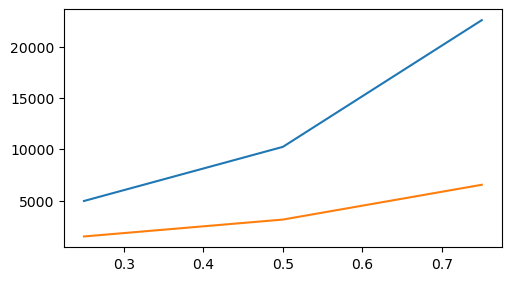

In [4]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(medidas_resumo1, label = 'linear')

{'whiskers': [<matplotlib.lines.Line2D at 0x13c05dba0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c05dba350>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c05db9f90>,
 'medians': [<matplotlib.lines.Line2D at 0x13c05dba5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c05dba710>,
 'means': []}

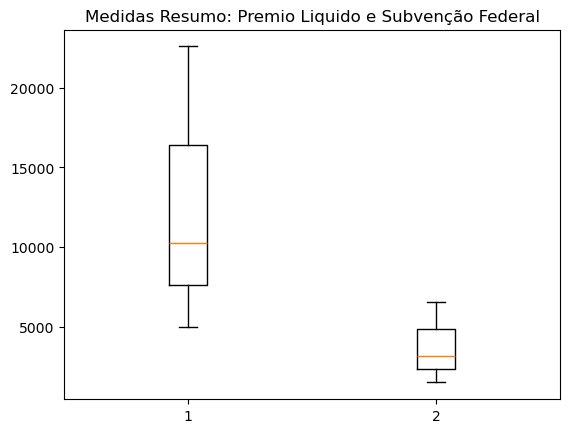

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_title("Medidas Resumo: Premio Liquido e Subvenção Federal")
ax1.boxplot(medidas_resumo1)

In [6]:
medidas_resumo2 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'VL_LIMITE_GARANTIA', 'NR_AREA_TOTAL']].agg(['mean', 'min', 'max'])
medidas_resumo2

,VL_PREMIO_LIQUIDO,VL_SUBVENCAO_FEDERAL,VL_LIMITE_GARANTIA,NR_AREA_TOTAL
mean,19397.15,5416.18,312463.30,64.30
min,55.34,0.01,753.48,0.00
max,893218.14,48000.00,520323520.32,290985.00


In [7]:
#seguradoras
seg['NM_RAZAO_SOCIAL'].unique()

array(['Newe Seguros S.A', 'BRASILSEG COMPANHIA DE SEGUROS',
       'Mapfre Seguros Gerais S.A.',
       'FairFax Brasil Seguros Corporativos S/A', 'Too Seguros S.A.',
       'Tokio Marine Seguradora S.A.',
       'Swiss Re Corporate Solutions Brasil S.A.', 'Allianz Seguros S.A',
       'Sancor Seguros do Brasil S.A.', 'Aliança do Brasil Seguros S/A.',
       'Essor Seguros S.A.', 'Porto Seguro Companhia de Seguros Gerais',
       'Companhia Excelsior de Seguros', 'Sompo Seguros S/A',
       'EZZE Seguros S.A.'], dtype=object)

In [8]:
#apolices por seguradora, Normalize = True p/ porcentagem
apolices_por_seguradora = seg['NM_RAZAO_SOCIAL'].value_counts(normalize=True, ascending=True) 
apolices_por_seguradora

NM_RAZAO_SOCIAL
Companhia Excelsior de Seguros             0.00
EZZE Seguros S.A.                          0.00
Porto Seguro Companhia de Seguros Gerais   0.01
Sompo Seguros S/A                          0.01
Too Seguros S.A.                           0.02
Aliança do Brasil Seguros S/A.             0.02
Sancor Seguros do Brasil S.A.              0.03
Allianz Seguros S.A                        0.04
Swiss Re Corporate Solutions Brasil S.A.   0.05
FairFax Brasil Seguros Corporativos S/A    0.08
Newe Seguros S.A                           0.08
Tokio Marine Seguradora S.A.               0.08
Mapfre Seguros Gerais S.A.                 0.09
Essor Seguros S.A.                         0.16
BRASILSEG COMPANHIA DE SEGUROS             0.34
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Apolices por seguradora (%)')

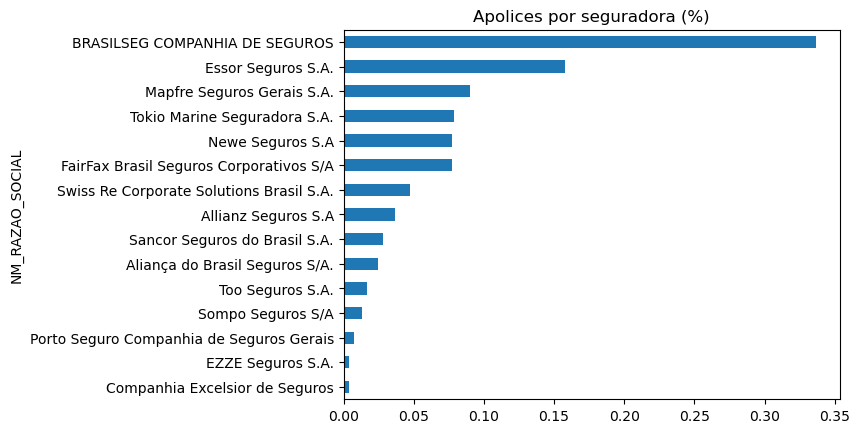

In [9]:
apolices_por_seguradora.plot.barh()
plt.title("Apolices por seguradora (%)")

In [ ]:
#LIMPEZA E ORGANIZAÇÃO DOS DADOS

In [10]:
#verificar se existe algum valor faltante, sem o sum retorna true e false
seg.isna().sum()

NM_RAZAO_SOCIAL              0
CD_PROCESSO_SUSEP            0
NR_PROPOSTA                  0
ID_PROPOSTA                  0
DT_PROPOSTA                  0
DT_INICIO_VIGENCIA           0
DT_FIM_VIGENCIA              0
NM_SEGURADO                  0
NR_DOCUMENTO_SEGURADO        0
NM_MUNICIPIO_PROPRIEDADE     0
SG_UF_PROPRIEDADE            0
LATITUDE                     0
NR_GRAU_LAT                  0
NR_MIN_LAT                   0
NR_SEG_LAT                   0
LONGITUDE                    0
NR_GRAU_LONG                 0
NR_MIN_LONG                  0
NR_SEG_LONG                  0
NR_DECIMAL_LATITUDE          0
NR_DECIMAL_LONGITUDE         0
NM_CLASSIF_PRODUTO           0
NM_CULTURA_GLOBAL            0
NR_AREA_TOTAL                0
NR_ANIMAL                    0
NR_PRODUTIVIDADE_ESTIMADA    0
NR_PRODUTIVIDADE_SEGURADA    0
NivelDeCobertura             0
VL_LIMITE_GARANTIA           0
VL_PREMIO_LIQUIDO            0
PE_TAXA                      0
VL_SUBVENCAO_FEDERAL         0
NR_APOLI

In [11]:
#ações possíveis para tratamento de informações faltantes (caso seja necessario)
seg = seg.fillna(0) #substitui faltantes por algum valor



In [12]:
#substituir faltantes de uma variável pela média da variável
seg['VL_PREMIO_LIQUIDO'] = seg['VL_PREMIO_LIQUIDO'].fillna(seg['VL_PREMIO_LIQUIDO'].mean())

In [13]:
#aqui temos alguns caracteres como '-', por isso vamos retirá-los no 
seg['NR_ANIMAL'].unique()

array([0, '-', 143, 8, 96, 141, 112, 100, 48, 1055, 176, 79, 966, 122,
       130, 86, 90, 50, 84, 44, 25, 180, 771, 1787, 60, 53, 54, 1, 2507,
       2, 512, 451, 110, 923, 67, 105, 24, 77, 165, 40, 69, 148, 524, 231,
       300, 5, 3, 120, 4, 17, 6, 11, 26, 32, 13, 240, 106, 322, 94, 867,
       125, 128, 66, 283, 37, 1323, 6200, 70, 52, 62, 80, 260, 42, 116,
       36, 292, 10, 858, 172, 61, 43, 33, 83, 99, 57, 72, 150, 155, 216,
       20, 273, 115, 88, 245, 64, 111, 233, 200, 183, 101, 421, 218, 163,
       851, 55, 117, 370, 65, 196, 371, 550, 140, 169, 160, 109, 185, 268,
       335, 426, 184, 68, 166, 535, 214, 1390, 1530, 103, 500, 87, 89,
       235, 450, 19, 350, 30, 27, 220, 560, 145, 82, 146, 75, 45, 164, 95,
       39, 142, 210, 76, 1300, 492, 168, 1790, 361, 212, 632, 78, 605,
       1256, 97, 171, 34, 360, 281, 187, 41, 119, 232, 51, 74, 650, 7,
       126, 93, 249, 279, 134, 63, 250, 285, 540, 49, 107, 1200, 14, 35,
       38, 46, 1027, 314, 286, 22, 31, 16, 15, 312, 1

In [14]:
#substituir caracteres como '.', '-', '...', etc
#salvando em um novo objeto, para manter os dados em seg originais
df = seg.replace(['-', '...', 'X'], 0)
df.dropna(inplace=True, how='all') #apagar ,linhas, caso ainda exista alguma com valores faltantes. 


In [15]:
df.shape

(212839, 38)

In [16]:
df.columns

Index(['NM_RAZAO_SOCIAL', 'CD_PROCESSO_SUSEP', 'NR_PROPOSTA', 'ID_PROPOSTA',
       'DT_PROPOSTA', 'DT_INICIO_VIGENCIA', 'DT_FIM_VIGENCIA', 'NM_SEGURADO',
       'NR_DOCUMENTO_SEGURADO', 'NM_MUNICIPIO_PROPRIEDADE',
       'SG_UF_PROPRIEDADE', 'LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT',
       'NR_SEG_LAT', 'LONGITUDE', 'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG',
       'NR_DECIMAL_LATITUDE', 'NR_DECIMAL_LONGITUDE', 'NM_CLASSIF_PRODUTO',
       'NM_CULTURA_GLOBAL', 'NR_AREA_TOTAL', 'NR_ANIMAL',
       'NR_PRODUTIVIDADE_ESTIMADA', 'NR_PRODUTIVIDADE_SEGURADA',
       'NivelDeCobertura', 'VL_LIMITE_GARANTIA', 'VL_PREMIO_LIQUIDO',
       'PE_TAXA', 'VL_SUBVENCAO_FEDERAL', 'NR_APOLICE', 'DT_APOLICE',
       'ANO_APOLICE', 'CD_GEOCMU', 'VALOR_INDENIZAÇÃO',
       'EVENTO_PREPONDERANTE'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   NM_RAZAO_SOCIAL            212839 non-null  object        
 1   CD_PROCESSO_SUSEP          212839 non-null  int64         
 2   NR_PROPOSTA                212839 non-null  object        
 3   ID_PROPOSTA                212839 non-null  int64         
 4   DT_PROPOSTA                212839 non-null  datetime64[ns]
 5   DT_INICIO_VIGENCIA         212839 non-null  datetime64[ns]
 6   DT_FIM_VIGENCIA            212839 non-null  object        
 7   NM_SEGURADO                212839 non-null  object        
 8   NR_DOCUMENTO_SEGURADO      212839 non-null  object        
 9   NM_MUNICIPIO_PROPRIEDADE   212839 non-null  object        
 10  SG_UF_PROPRIEDADE          212839 non-null  object        
 11  LATITUDE                   212839 non-null  object  

In [18]:
#Sera criada uma nova coluna, com a duração das apolices em dias. DT_FIM_VIGENCIA, está como objeto e precisa ser alterada. 

df['DT_FIM_VIGENCIA'] = pd.to_datetime(df['DT_FIM_VIGENCIA'], errors = 'coerce')

#criar uma nova coluna com a duração das apólices
df['duracao'] = (df['DT_FIM_VIGENCIA'] - df['DT_INICIO_VIGENCIA']).dt.days

#ordenar os valores da coluna nova
df.sort_values('duracao', ascending=False)

,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE,duracao
666334,Aliança do Brasil Seguros S/A.,15414901479201927,55293108,1492577,2021-11-03,2021-11-03,2031-11-09,MARIA HELGA HEINZ LAUBERT FILIP,***34426915,Guarapuava,PR,S,25,34,59,W,51,32,34,0,0,CUSTEIO,Soja,21.13,0,4199.60,3359.68,0.80,82407.00,2820.15,0.03,564.03,23732,2021-11-09,2021,4109401,0,0,3658.00
516408,Tokio Marine Seguradora S.A.,15414900116201621,3797493,1326158,2021-03-15,2021-03-15,2026-08-16,MARILENA BORGES PAN,***59262805,Aguai,SP,S,22,8,3,W,46,56,48,0,0,CUSTEIO,Tomate,30.00,0,0,0,0,846749.99,44827.00,0.05,17930.80,10268884,2021-03-18,2021,0,0,0,1980.00
519931,Tokio Marine Seguradora S.A.,15414900116201621,3825476,1330184,2021-03-22,2021-03-22,2025-12-26,ANDRE LUIZ VALCANAIA MOSS,***12925900,Palmeirinha,PR,S,25,16,49,W,51,39,42,0,0,CUSTEIO,Batata,100.00,0,0,0,0,1296000.00,89424.00,0.07,35769.60,1050235,2021-04-06,2021,4109401,83342.56,GEADA,1740.00
511450,Tokio Marine Seguradora S.A.,15414900116201621,3777451,1320405,2021-03-09,2021-03-09,2025-06-15,ELISANGELA PEREIRA DA SILVA,***38092885,Laranjal Paulista,SP,S,23,1,31,W,47,52,23,0,0,CUSTEIO,Tomate,8.00,0,0,0,0,117120.00,16683.00,0.14,6673.20,10268849,2021-03-17,2021,3526407,0,0,1559.00
509042,Tokio Marine Seguradora S.A.,15414900116201621,3774079,1317629,2021-03-08,2021-03-08,2024-10-18,EDUARD WOLBERT,***56278919,Reserva do Iguaçu,PR,S,25,50,1,W,52,2,35,0,0,CUSTEIO,Batata,100.00,0,0,0,0,1600000.00,110399.00,0.07,44159.60,1050223,2021-03-22,2021,4121752,0,0,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632726,FairFax Brasil Seguros Corporativos S/A,15414900270201601,2296,1456437,2021-08-12,2021-08-12,2021-09-11,RICARDO DE ANDRADE GOUVEIA,***34814668,Inaciolândia,GO,S,18,25,10,W,50,0,8,0,0,PRODUTIVIDADE,Pecuário,0.00,7,0,0,0,253500.00,3422.25,0.01,1368.90,1000300001668,2021-08-12,2021,5209937,0,0,30.00
638860,FairFax Brasil Seguros Corporativos S/A,15414900270201601,2436,1463098,2021-08-31,2021-08-31,2021-09-30,HARAS EAO LTDA,***61008000171,Uberaba,MG,S,19,50,26,W,48,3,24,0,0,PRODUTIVIDADE,Pecuário,0.00,47,0,0,0,1848200.00,24950.69,0.01,9980.28,1000300001745,2021-09-17,2021,3170107,0,0,30.00
639227,Swiss Re Corporate Solutions Brasil S.A.,15414000338200590,02031011564,1463493,2021-09-17,2021-09-20,2021-10-20,Luiz Roberto Saalfeld,***87658087,São Lourenço do Sul,RS,S,31,24,15,W,52,0,51,0,0,PECUÁRIO,Pecuário,0.00,1,0,0,0,240000.00,1440.00,0.01,575.99,02030004429,2021-09-28,2021,4318804,0,0,30.00
522405,FairFax Brasil Seguros Corporativos S/A,15414900270201601,1861,1332884,2021-05-14,2021-05-14,2021-06-13,CLAUDIO SABINO CARVALHO FILHO,***56670603,Uberaba,MG,S,19,37,0,W,47,59,26,0,0,PRODUTIVIDADE,Pecuário,0.00,6,0,0,0,241500.00,3260.25,0.01,1304.10,1000300001365,2021-05-24,2021,3170107,0,0,30.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   NM_RAZAO_SOCIAL            212839 non-null  object        
 1   CD_PROCESSO_SUSEP          212839 non-null  int64         
 2   NR_PROPOSTA                212839 non-null  object        
 3   ID_PROPOSTA                212839 non-null  int64         
 4   DT_PROPOSTA                212839 non-null  datetime64[ns]
 5   DT_INICIO_VIGENCIA         212839 non-null  datetime64[ns]
 6   DT_FIM_VIGENCIA            212838 non-null  datetime64[ns]
 7   NM_SEGURADO                212839 non-null  object        
 8   NR_DOCUMENTO_SEGURADO      212839 non-null  object        
 9   NM_MUNICIPIO_PROPRIEDADE   212839 non-null  object        
 10  SG_UF_PROPRIEDADE          212839 non-null  object        
 11  LATITUDE                   212839 non-null  object  

In [20]:
#algumas colunas serão retiradas
retirar = ['CD_PROCESSO_SUSEP', 'NR_PROPOSTA', 'ID_PROPOSTA', 'DT_PROPOSTA', 'DT_INICIO_VIGENCIA', 
           'DT_FIM_VIGENCIA', 'NM_SEGURADO', 'NR_DOCUMENTO_SEGURADO', 'LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT', 
          'NR_SEG_LAT', 'LONGITUDE', 'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG', 'NR_DECIMAL_LATITUDE', 
           'NR_DECIMAL_LONGITUDE', 'DT_APOLICE', 'ANO_APOLICE']
df = df.drop(retirar, axis = 1)

In [21]:
#necessario retirar os catacteres a mais
df['EVENTO_PREPONDERANTE'].unique() 

array(['\xa0SECA', 0, '\xa0GEADA', '\xa0GRANIZO',
       '\xa0VENTOS FORTES/FRIOS', '\xa0CHUVA EXCESSIVA', '\xa0INCÊNDIO',
       '\xa0DEMAIS CAUSAS', '\xa0VARIAÇÃO EXCESSIVA DE TEMPERATURA',
       '\xa0RAIO', '\xa0MORTE', '\xa0INUNDAÇÃO/TROMBA D´ÁGUA',
       '\xa0VARIAÇÃO DE PREÇO', '\xa0DOENÇAS E PRAGAS',
       '\xa0QUEDA DE PARREIRAL', '\xa0PERDA DE QUALIDADE',
       '\xa0REPLANTIO'], dtype=object)

In [22]:
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].str.split().str.join('  ') #separa as strings e junta elas apenas onde ficaram com 2 espaços
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].replace([np.nan], '0') #OBS: existem vários tipos de 

In [23]:
df['EVENTO_PREPONDERANTE'].unique()

array(['SECA', '0', 'GEADA', 'GRANIZO', 'VENTOS  FORTES/FRIOS',
       'CHUVA  EXCESSIVA', 'INCÊNDIO', 'DEMAIS  CAUSAS',
       'VARIAÇÃO  EXCESSIVA  DE  TEMPERATURA', 'RAIO', 'MORTE',
       'INUNDAÇÃO/TROMBA  D´ÁGUA', 'VARIAÇÃO  DE  PREÇO',
       'DOENÇAS  E  PRAGAS', 'QUEDA  DE  PARREIRAL',
       'PERDA  DE  QUALIDADE', 'REPLANTIO'], dtype=object)

In [24]:
df.shape

(212839, 19)

In [25]:
#retirar espaços em branco (caso haja algum)
df['NM_RAZAO_SOCIAL'] = df['NM_RAZAO_SOCIAL'].str.strip()
df['NM_CULTURA_GLOBAL'] = df['NM_CULTURA_GLOBAL'].str.strip()

In [26]:
#USO DO GROUPBY
df.groupby('SG_UF_PROPRIEDADE')['VL_PREMIO_LIQUIDO'].sum().sort_values(ascending=False) #agrupando a soma dos prêmios líquidos por Estado

SG_UF_PROPRIEDADE
PR   1207568809.67
RS    943467577.41
MS    416927473.24
SP    387538424.06
GO    341964503.67
MG    213468609.40
MT    167714176.38
SC    164561358.71
BA     70505887.60
TO     70003349.94
MA     59008550.89
PI     30612102.75
SE     15288463.45
ES     14315532.89
PA     12281555.47
RO      5619605.37
DF      2778740.08
AM      1506708.51
PB      1272811.28
AL      1116403.03
PE       333569.43
AC       231113.51
RJ       211341.99
RR       138730.63
CE        30761.83
RN         4388.67
Name: VL_PREMIO_LIQUIDO, dtype: float64

Text(0.5, 1.0, 'Valores segurados por Estado (Bilhões)')

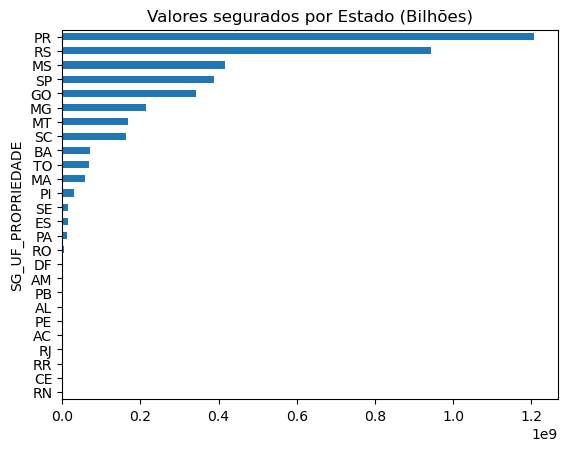

In [27]:
premio_estado =  df.groupby('SG_UF_PROPRIEDADE')['VL_PREMIO_LIQUIDO'].sum().sort_values(ascending=True)
premio_estado.plot.barh()
plt.title("Valores segurados por Estado (Bilhões)")

In [28]:
#CALCULANDO O ÍNDICE DE SINISTRALIDADE
#O índice mede (em %) a participação do valor total de indenizações pagas aos produtores,
#em relação ao valor total do prêmio arrecadado pelas seguradoras. 65% é entendido como valor limite aceitável. 
#Esse índice permite inferencias sobre o equilíbrio atuarial das operações de seguro rural. 

sinistralidade = (df['VALOR_INDENIZAÇÃO'].sum()) / (df['VL_PREMIO_LIQUIDO'].sum()) * 100 
print("Índice de Sinistralidade" + " é " + str(sinistralidade) + " %")

Índice de Sinistralidade é 236.92896963035457 %


In [35]:
#alterando o nome das colunas, lembrando que todas precisam estar na ordem que aparecem no dataframe
df.columns = ['seguradora', 'municipio', 'uf', 'tipo_prod', 'cultura', 
             'area', 'animal', 'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
             'taxa', 'subvencao', 'apolice', 'cod_mun', 'indenizacao', 'evento', 'duracao'] 

In [36]:
#novos nomes; Dtype ok
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   seguradora   212839 non-null  object 
 1   municipio    212839 non-null  object 
 2   uf           212839 non-null  object 
 3   tipo_prod    212839 non-null  object 
 4   cultura      212839 non-null  object 
 5   area         212839 non-null  float64
 6   animal       212839 non-null  object 
 7   prod_est     212839 non-null  object 
 8   prod_seg     212839 non-null  object 
 9   nivel_cob    212839 non-null  object 
 10  total_seg    212839 non-null  float64
 11  premio       212839 non-null  float64
 12  taxa         212839 non-null  float64
 13  subvencao    212839 non-null  float64
 14  apolice      212839 non-null  object 
 15  cod_mun      212839 non-null  object 
 16  indenizacao  212839 non-null  object 
 17  evento       212839 non-null  object 
 18  duracao      212838 non-

In [38]:
#transformando mun em inteiro, pois é um código
df['cod_mun'] = df['cod_mun'].astype(int)
df['indenizacao'] = df['indenizacao'].astype(float)

In [40]:
#criando uma coluna com a sinistralidade
df['sinistralidade'] = df['indenizacao'] / df['premio']
df.sample(10)

,seguradora,municipio,uf,tipo_prod,cultura,area,animal,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,apolice,cod_mun,indenizacao,evento,duracao,sinistralidade
539806,Tokio Marine Seguradora S.A.,Jundiaí,SP,CUSTEIO,Ameixa,5.00,0,0,0,0,120000.00,23250.00,0.19,9300.00,10270146,3525904,0.00,0,392.00,0.00
676247,Aliança do Brasil Seguros S/A.,Manduri,SP,CUSTEIO,Milho 1ª safra,10.00,0,6000,3900,0.65,31000.01,1935.75,0.06,483.94,21584,3528601,0.00,0,365.00,0.00
643751,Sompo Seguros S/A,Assis Chateaubriand,PR,PRODUTIVIDADE,Soja,4.36,0,4042.67,2627.74,0.65,26732.87,2284.59,0.09,456.92,5800006337,4102000,21085.25,SECA,150.00,9.23
501051,Allianz Seguros S.A,Platina,SP,PRODUTIVIDADE,Milho 2ª safra,26.00,0,4810.32,3126.71,0.65,81294.46,9253.76,0.11,3701.49,5177202125010002131,3539707,153408.32,GEADA,308.00,16.58
516908,Newe Seguros S.A,Vicentina,MS,CUSTEIO,Milho 2ª safra,25.36,0,4005,2603.40,0.65,60516.82,5567.55,0.09,2227.02,10001010030157,5008404,28915.49,SECA,181.00,5.19
544738,Newe Seguros S.A,Dom Pedrito,RS,CUSTEIO,Trigo,130.00,0,2320.20,1508.40,0.65,245050.00,37762.76,0.15,15105.10,10001020000055,4306601,0.00,0,151.00,0.00
637659,Sancor Seguros do Brasil S.A.,Indaiatuba,SP,PRODUTIVIDADE,Uva,0.82,0,0,0,0,36500.00,3453.27,0.09,1381.31,1000111093875,3520509,0.00,0,197.00,0.00
544965,BRASILSEG COMPANHIA DE SEGUROS,Goiatuba,GO,CUSTEIO,Milho 2ª safra,26.00,0,5780,3757,0.65,59724.60,4852.62,0.08,1941.05,500163,5209101,0.00,0,365.00,0.00
625740,Mapfre Seguros Gerais S.A.,Balsa Nova,PR,CUSTEIO,Soja,26.61,0,4135.80,2895,0.70,119745.00,9133.55,0.08,1826.71,3354003615701,4102307,0.00,0,267.00,0.00
677923,BRASILSEG COMPANHIA DE SEGUROS,Restinga Seca,RS,CUSTEIO,Soja,14.50,0,2273,1591.10,0.70,64934.68,6643.74,0.10,1328.75,184811,4315503,0.00,0,365.00,0.00


In [47]:
#variável de indicação: 0 = não houve sinistro; 1 = houve sinistro a partir da variável evento
#caso 'evento' seja 0 = não houve sisnitro; se 'evento' = SECA, CHUVA EXCESSIVA, etc., existiu sinistro
df['sinistro'] = np.where(df['evento'].str.isnumeric(), 0, 1)


In [48]:
df.describe()

,area,total_seg,premio,taxa,subvencao,cod_mun,indenizacao,duracao,sinistralidade,sinistro
count,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212838.00,212839.00,212839.00
mean,64.30,312463.30,19397.15,0.08,5416.18,3992490.81,45957.47,296.29,2.55,0.52
std,672.28,1374670.95,27293.34,0.04,6703.20,843198.82,125667.89,77.16,4.25,0.50
min,0.00,753.48,55.34,0.00,0.01,0.00,0.00,30.00,0.00,0.00
25%,12.42,71916.99,4960.00,0.05,1499.85,4101150.00,0.00,227.00,0.00,0.00
50%,30.00,150027.47,10239.68,0.07,3147.74,4117909.00,0.00,321.00,0.00,1.00
75%,71.80,338111.80,22598.85,0.10,6540.79,4307401.00,40372.90,365.00,4.49,1.00
max,290985.00,520323520.32,893218.14,1.00,48000.00,5300108.00,6407193.25,3658.00,203.98,1.00


In [49]:
df.columns

Index(['seguradora', 'municipio', 'uf', 'tipo_prod', 'cultura', 'area',
       'animal', 'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
       'taxa', 'subvencao', 'apolice', 'cod_mun', 'indenizacao', 'evento',
       'duracao', 'sinistralidade', 'sinistro'],
      dtype='object')

In [50]:
#Reorganizando as variáveis para melhor visualização usando .loc
df = df.loc[:, ['apolice', 'cod_mun', 'municipio', 'uf', 'seguradora', 'cultura', 'area', 'animal', 
                'duracao', 'prod_est', 'prod_seg', 'total_seg', 'premio', 'taxa', 'subvencao',
               'indenizacao', 'evento', 'sinistro', 'sinistralidade']]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   apolice         212839 non-null  object 
 1   cod_mun         212839 non-null  int64  
 2   municipio       212839 non-null  object 
 3   uf              212839 non-null  object 
 4   seguradora      212839 non-null  object 
 5   cultura         212839 non-null  object 
 6   area            212839 non-null  float64
 7   animal          212839 non-null  object 
 8   duracao         212838 non-null  float64
 9   prod_est        212839 non-null  object 
 10  prod_seg        212839 non-null  object 
 11  total_seg       212839 non-null  float64
 12  premio          212839 non-null  float64
 13  taxa            212839 non-null  float64
 14  subvencao       212839 non-null  float64
 15  indenizacao     212839 non-null  float64
 16  evento          212839 non-null  object 
 17  sinistro  

In [52]:
#ascending = True, mostra do menor para o maior.
df.sort_values('premio') 

,apolice,cod_mun,municipio,uf,seguradora,cultura,area,animal,duracao,prod_est,prod_seg,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
657878,1000100057010,3149101,Pedralva,MG,FairFax Brasil Seguros Corporativos S/A,Café,0.60,0,303.00,0,0,8100.00,55.34,0.01,22.14,0.00,0,0,0.00
686715,152660,3139409,Manhuaçu,MG,BRASILSEG COMPANHIA DE SEGUROS,Café,0.10,0,365.00,3250,2275,1522.89,66.38,0.04,26.55,0.00,0,0,0.00
620041,1000111091873,3128105,Guapé,MG,Sancor Seguros do Brasil S.A.,Café,0.28,0,366.00,0,0,1680.00,71.40,0.04,28.56,0.00,0,0,0.00
654885,1000100056630,3125200,Fama,MG,FairFax Brasil Seguros Corporativos S/A,Café,0.38,0,320.00,0,0,6498.00,99.95,0.02,39.98,0.00,0,0,0.00
489399,6609001933201,3144003,Mutum,MG,Mapfre Seguros Gerais S.A.,Café,1.00,0,365.00,0,0,7000.00,100.00,0.01,40.00,0.00,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686277,190769,2201903,Bom Jesus,PI,BRASILSEG COMPANHIA DE SEGUROS,Milho 1ª safra,1280.00,0,365.00,5909,3840.85,6572800.02,645849.04,0.10,6456.67,0.00,0,0,0.00
686042,159808,2106706,Mirador,MA,BRASILSEG COMPANHIA DE SEGUROS,Soja,2256.60,0,365.00,3000,1950,8384900.02,655741.07,0.08,48000.00,0.00,0,0,0.00
685843,145974,4205902,Gaspar,SC,BRASILSEG COMPANHIA DE SEGUROS,Soja,1560.00,0,365.00,2273,1477.45,14872802.41,761325.53,0.05,10394.00,0.00,0,0,0.00
593257,1000111164599,4322509,Vacaria,RS,Essor Seguros S.A.,Maçã,167.55,0,319.00,48542,48542,7556670.00,803274.07,0.11,48000.00,143111.85,GRANIZO,1,0.18


In [53]:
df.columns

Index(['apolice', 'cod_mun', 'municipio', 'uf', 'seguradora', 'cultura',
       'area', 'animal', 'duracao', 'prod_est', 'prod_seg', 'total_seg',
       'premio', 'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
       'sinistralidade'],
      dtype='object')

In [54]:
#selecionando algumas colunas e o valor de subvenção
df[['municipio', 'uf', 'cultura', 'subvencao']].sort_values('subvencao', ascending=False)

,municipio,uf,cultura,subvencao
490899,Itaberá,SP,Sorgo,48000.00
542219,Campos Gerais,MG,Café,48000.00
697437,Guaraí,TO,Milho 2ª safra,48000.00
532082,Aral Moreira,MS,Milho 2ª safra,48000.00
696465,Balsas,MA,Milho 2ª safra,48000.00
...,...,...,...,...
606330,Muitos Capões,RS,Maçã,0.01
646569,Amambaí,MS,Soja,0.01
531433,Vacaria,RS,Maçã,0.01
532169,Mamborê,PR,Trigo,0.01


In [55]:
df.shape #mesmo número de linhas da base SEG

(212839, 19)

In [57]:
#Salvando os dados limpos como xlsx (index = false para não salvar o df como uma coluna do df atual)
df.to_excel("seguro-rural-limpo-2016-2021.xlsx", index = False)

In [ ]:
#caso quisermos salvar como csv
#df.to_excel("seguro-rural-2021.csv", index=False, encoding='latin1')

In [58]:
#verificar se os dados serão lidos corretamente
dados = pd.read_excel("seguro-rural-2016-2021.xlsx")

In [50]:
#function from: https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
#função caso precise fazer as mesmas plotagens com dados diferentes
#data1 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'NR_AREA_TOTAL']].quantile([0.25, 0.5, 0.75])
#data2 = seg[[

#def my_plotter(ax, data1, data2, param_dict):
#    """
#    A helper function to make a graph.
#    """
#    out = ax.plot(data1, data2, **param_dict)
#    return out


#data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
#my_plotter(ax1, data1, data2, {'marker': 'x'})
#my_plotter(ax2, data3, data4, {'marker': 'o'})